#### Here are some EDA on 1,000,000 playlists. 
* Understanding the data structure
* Handling missing value
* Performing Data Tranformation
* Visualize Data Relationship

#### Data Visualization Topics:
* Top 50 Most Popular Playlists
* Top 10 Popular Artists
* Top 10 Energetic Tracks
* Top Artists With The Most Danceability Tracks
* Top 50 Intrumentalness Tracks
* Most trending Gernes
* Top 10 Happy/Sad Tracks 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Part I: Overview The Dataset

In [2]:
playlists_df = pd.read_csv('playlists_df.csv')

In [3]:
tracks_df = pd.read_csv('tracks_df.csv')

In [ ]:
spotifymilsongs.to_csv('spotifymilsongs.csv', index=False)

# Part II: EDA ( Exploratory Data Analysis)

## 1. Playlists Level 
**Description:** This is the dataframe contain only playlists along 24 json files. Here are the variables (metadata included) inside each playlist). Tracks column represent the list of track's metadata.

In [5]:
playlists_df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,life,False,981000,1507766400,86,77,1,"[{'pos': 0, 'artist_name': 'Nicki Minaj', 'tra...",2,18075322,65,NaN
1,New Folk,False,981001,1421539200,85,43,1,"[{'pos': 0, 'artist_name': 'Mumford & Sons', '...",31,16711273,38,NaN
2,rock,False,981002,1497744000,49,44,1,"[{'pos': 0, 'artist_name': 'a-ha', 'track_uri'...",6,12050389,39,NaN
3,Rock,False,981003,1475884800,21,18,1,"[{'pos': 0, 'artist_name': 'Good With Grenades...",4,5461213,16,NaN
4,Litty,False,981004,1509321600,205,150,1,"[{'pos': 0, 'artist_name': 'Kendrick Lamar', '...",45,45534634,105,NaN


### Getting Inside The Dataset

In [6]:
playlists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   name           999989 non-null   object
 1   collaborative  1000000 non-null  bool  
 2   pid            1000000 non-null  int64 
 3   modified_at    1000000 non-null  int64 
 4   num_tracks     1000000 non-null  int64 
 5   num_albums     1000000 non-null  int64 
 6   num_followers  1000000 non-null  int64 
 7   tracks         1000000 non-null  object
 8   num_edits      1000000 non-null  int64 
 9   duration_ms    1000000 non-null  int64 
 10  num_artists    1000000 non-null  int64 
 11  description    18758 non-null    object
dtypes: bool(1), int64(8), object(3)
memory usage: 84.9+ MB


**Analysis:** 
* The Dataframe contain 1,000,000 entries corresponds to number of playlists in the dataset, the entries are indexed from 0-999,999
* This dataframe shows the metadata at playlists level, which contains 12 columns of playlist's name, collaborative (if the playlists being owned by more than 1 user),...
* Most of the columns have completed data, only 11 playlists are unnamed. desciption columns has only 18,758 non-null entries but it doesn't affect that much since description are optional.
* This dataframe contains 1 boolean column (collaborative), 8 integer columns, and 3 object columns (written in text).

In [8]:
playlists_df.nunique()

name               92940
collaborative          2
pid              1000000
modified_at         2294
num_tracks           247
num_albums           243
num_followers        620
tracks            998083
num_edits            197
duration_ms       980790
num_artists          231
description        18138
dtype: int64

**Analysis:** This shows the number of unique entries in each columns. For example:
* Name: 92940 name of the playlists are unique, the rest of them has some repeated name for some playlists.
* Collaborative: there are only 2 entries since this column is boolean (yes/no).
* pid: Playlists IDs should be unique since we use them to idenitfy each playlists
* Description: There are only 18,758 playlists has description but there only 18,138 are unique. Therefore, there are 620 playlists who has the exact same description.

In [10]:
playlists_df.describe()

,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
count,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000
mean,499999.500000,1.476279e+09,66.346428,49.597278,2.597746,17.655902,1.557968e+07,38.088211
std,288675.278932,3.666992e+07,53.669358,39.961064,128.851145,20.643254,1.285643e+07,30.282901
min,0.000000,1.271376e+09,5.000000,2.000000,1.000000,1.000000,9.753800e+04,3.000000
25%,249999.750000,1.458950e+09,26.000000,20.000000,1.000000,5.000000,5.995383e+06,16.000000
50%,499999.500000,1.490227e+09,49.000000,37.000000,1.000000,10.000000,1.142244e+07,29.000000
75%,749999.250000,1.505434e+09,92.000000,68.000000,1.000000,22.000000,2.143369e+07,52.000000
max,999999.000000,1.509494e+09,376.000000,244.000000,71643.000000,201.000000,6.350738e+08,238.000000


**Analysis:** This shows the basic statistic on the dataset for each columns. For example: num_tracks
* Since every playlists contains different number of tracks (songs), the mean of 66.35 shows that the average number of tracks that each playlist has is approximate 67 tracks/playlist.
* The std=53.67 shows that the datapoint are spread out over a wide range from the mean. In other words, some playlists will a very few number of tracks, and some playlists has a lot of tracks.
* There are some small playlists which just have 5 songs and there are some big playlists which have 376 songs.                                                      

### Handling Missing Values

In [13]:
playlists_df.isnull().sum()

name                 11
collaborative         0
pid                   0
modified_at           0
num_tracks            0
num_albums            0
num_followers         0
tracks                0
num_edits             0
duration_ms           0
num_artists           0
description      981242
dtype: int64

**Analysis:** most of the entries don't have missing value except for 'Description' and 'Name' column since it's optional (we don't need to have desciption or name for our playlists). This is a very good and completed dataset, so we don't need to clean and handle the missing data.

## 2. Tracks & Artists Level

**Description:** This is a dataframe contains every information about track(track's metadata)

### Getting The Inside Of Dataset

In [33]:
tracks_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,playlist_name,playlist_pid
0,0,Nicki Minaj,spotify:track:7gKIt3rDGIMJDFVSPBnGmj,spotify:artist:0hCNtLu0JehylgoiP8L4Gh,Super Bass,spotify:album:2RfF6dGpYIN5u1mNkfG8Pb,200013,Pink Friday,life,981000
1,1,Dua Lipa,spotify:track:2eAAEa8pxKF7My0EO4rFgR,spotify:artist:6M2wZ9GZgrQXHCFfjv46we,Blow Your Mind (Mwah),spotify:album:01sfgrNbnnPUEyz6GZYlt9,178583,Dua Lipa,life,981000
2,2,ILoveMakonnen,spotify:track:5rnFOEEIBIWZ6dhHrY6zHh,spotify:artist:3aGFCoR8xGN6DKwvdzeSja,Love (feat. Rae Sremmurd),spotify:album:44sGCAuUKSGPbF6fSXO2vZ,283193,Love (feat. Rae Sremmurd),life,981000
3,3,J Balvin,spotify:track:7fwXWKdDNI5IutOMc5OKYw,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5,Mi Gente (feat. Beyoncé),spotify:album:0ARVq1kA5eRP4F5VsZsr3m,209733,Mi Gente (feat. Beyoncé),life,981000
4,4,Era Istrefi,spotify:track:19yIQRLAYMNxmEfdnnQDsS,spotify:artist:4poL7YCSkG7kMnWjAdDU91,No I Love Yous,spotify:album:6z4lsw2W6YwkA3CNDhGP42,180012,No I Love Yous,life,981000


In [34]:
tracks_df.shape

(66346428, 10)

There are 66346428 songs across 1 million playlists, those songs could be repeated in some playlists. In other words, some playlists has the same songs. 

In [35]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66346428 entries, 0 to 66346427
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   pos            int64 
 1   artist_name    object
 2   track_uri      object
 3   artist_uri     object
 4   track_name     object
 5   album_uri      object
 6   duration_ms    int64 
 7   album_name     object
 8   playlist_name  object
 9   playlist_pid   int64 
dtypes: int64(3), object(7)
memory usage: 4.9+ GB


**Analysis:** All the variable in this dataframe is object (written by text and number) except for pos (position of tracks in a playlist) and duration_ms (time of a song in m/s)

In [37]:
tracks_df.nunique()

pos                  376
artist_name       287739
track_uri        2262292
artist_uri        295860
track_name       1483758
album_uri         734684
duration_ms       315700
album_name        571626
playlist_name      92940
playlist_pid     1000000
dtype: int64

**Analysis:** 
* There are  295860 different artists and some of them have the same name because there are only 287739 unique artist names.
* There are 2262292 different songs and some of them have the same name because there are only  1483758 unique songs's names.

In [38]:
print("Total songs in 1M playlist:")
tracks_df.shape[0]

Total songs in 1M playlist:


66346428

In [38]:
tracks_df.describe()

,pos,duration_ms,playlist_pid
count,6.634643e+07,6.634643e+07,6.634643e+07
mean,5.438046e+01,2.348231e+05,4.999225e+05
std,4.824799e+01,7.455740e+04,2.891463e+05
min,0.000000e+00,-1.000000e+00,0.000000e+00
25%,1.700000e+01,1.984930e+05,2.488760e+05
50%,4.000000e+01,2.250710e+05,4.998990e+05
75%,7.900000e+01,2.592930e+05,7.507270e+05
max,3.750000e+02,2.074458e+07,9.999990e+05


### Handling Missing Value

In [40]:
tracks_df.isnull().sum()

pos                0
artist_name       13
track_uri          0
artist_uri         0
track_name       254
album_uri          0
duration_ms        0
album_name        19
playlist_name    777
playlist_pid       0
dtype: int64

**Analysis:** There are some columns which have missing values: artists_name (some of the song in non_lyrics songs and unknown artists), tracks_name, album (some of the songs and album are unnamed)

## 3. Data Visualization 

### 1. Top 50 Popular Playlists
**Notes:** Top 50 will be ranked by number of followers.

In [4]:
top50_playlists = playlists_df.nlargest(50, 'num_followers')

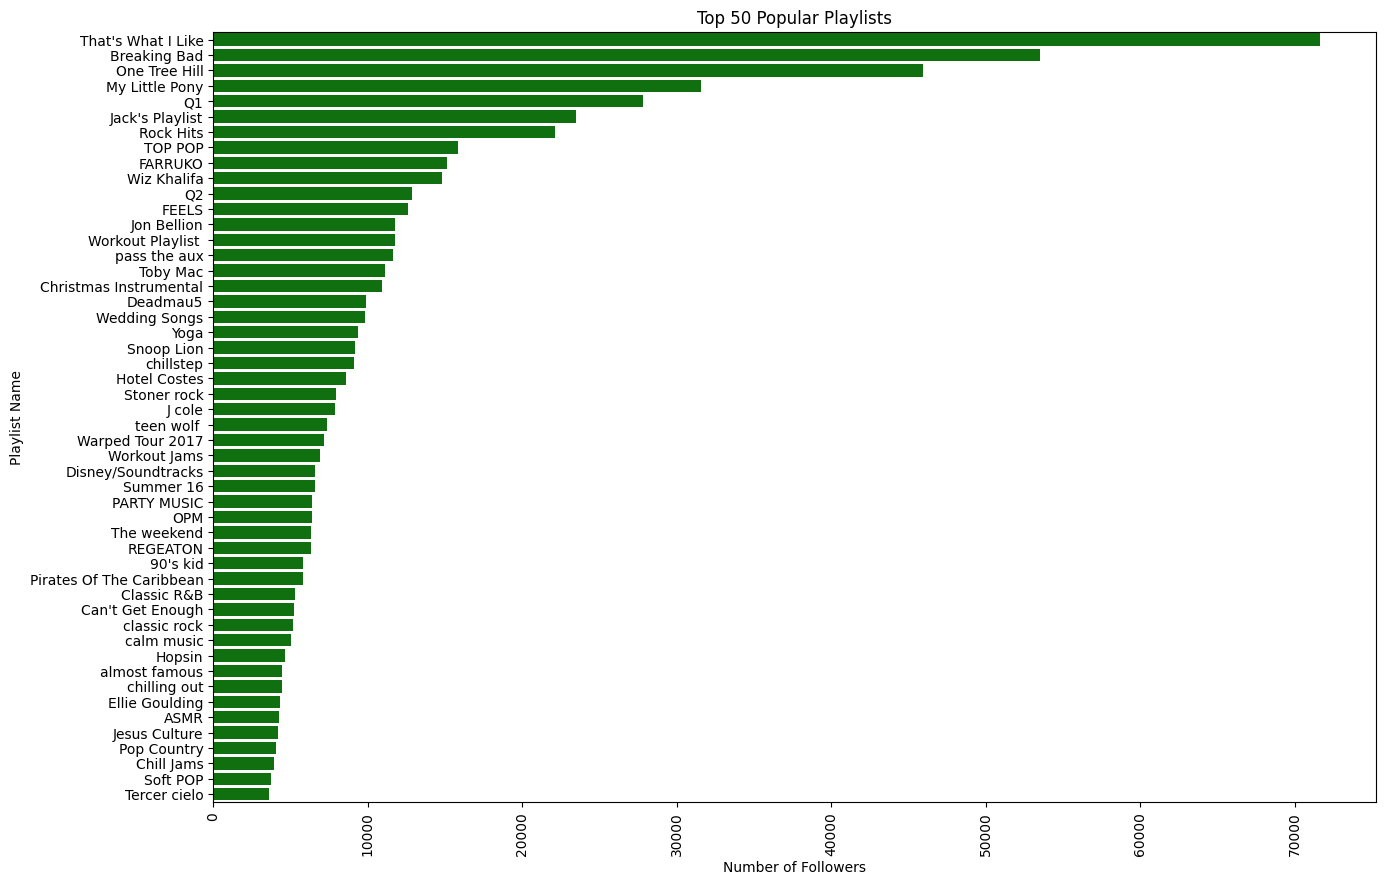

In [7]:
top50_playlists = playlists_df.nlargest(50, 'num_followers')
plt.figure(figsize=(15, 10))
sns.barplot(y='name', x='num_followers', data=top50_playlists, color='green')
plt.title('Top 50 Popular Playlists')
plt.xlabel('Number of Followers')
plt.ylabel('Playlist Name')
plt.xticks(rotation=90)
plt.show()

'That's What I like' is the most popular playlists with over 70,000 followers. Here is the information about that playlists. But there are 38 different playlists have the same name, the reason why is because most tracks contained in these playlists are from the artists 'Bruno Mars'. 

In [21]:
playlists_df[playlists_df['name']== "That's What I Like"].shape

(38, 12)

In [22]:
playlists_df[playlists_df['name']== "That's What I Like"].head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
43081,That's What I Like,False,493081,1497744000,19,19,1,"[{'pos': 0, 'artist_name': 'Bruno Mars', 'trac...",10,4688532,16,NaN
129485,That's What I Like,False,625485,1508112000,22,16,1,"[{'pos': 0, 'artist_name': 'Bruno Mars', 'trac...",10,4541254,13,NaN
149711,That's What I Like,False,886711,1480896000,26,18,1,"[{'pos': 0, 'artist_name': 'Bruno Mars', 'trac...",4,5970238,14,NaN
160747,That's What I Like,False,88747,1489536000,10,10,1,"[{'pos': 0, 'artist_name': 'Bruno Mars', 'trac...",5,2219922,10,NaN
228076,That's What I Like,False,420076,1492041600,82,65,1,"[{'pos': 0, 'artist_name': 'Bruno Mars', 'trac...",5,18889287,54,NaN


'Tercer cielo' is the least popular playlists in top 50 which has under 5000 followers. There are 3 different playlists with the same name because it contains the tracks from artist Tercer cielo. Here are the information about those playlists.

In [23]:
playlists_df[playlists_df['name']== "Tercer cielo"].shape

(3, 12)

In [24]:
playlists_df[playlists_df['name']== "Tercer cielo"]

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
1821,Tercer cielo,False,935821,1392076800,58,12,3638,"[{'pos': 0, 'artist_name': 'Tercer Cielo', 'tr...",4,14045223,4,NaN
230928,Tercer cielo,False,987928,1372723200,45,12,1,"[{'pos': 0, 'artist_name': 'Tercer Cielo', 'tr...",3,11249362,4,NaN
609392,Tercer cielo,False,738392,1367539200,95,37,6,"[{'pos': 0, 'artist_name': 'Tercer Cielo', 'tr...",33,24412498,19,NaN


### 2. Distribution of Tracks Per Playlists

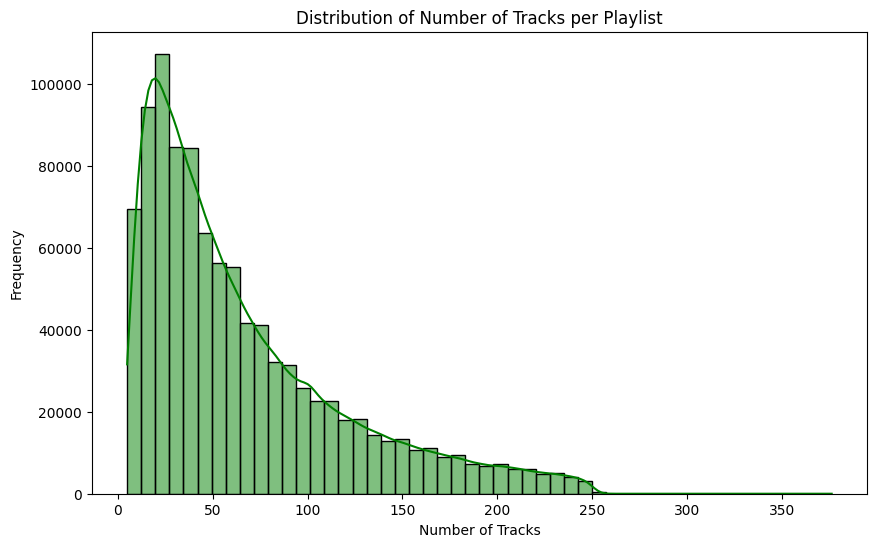

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(playlists_df['num_tracks'], bins=50, kde=True, color='green')
plt.title('Distribution of Number of Tracks per Playlist')
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

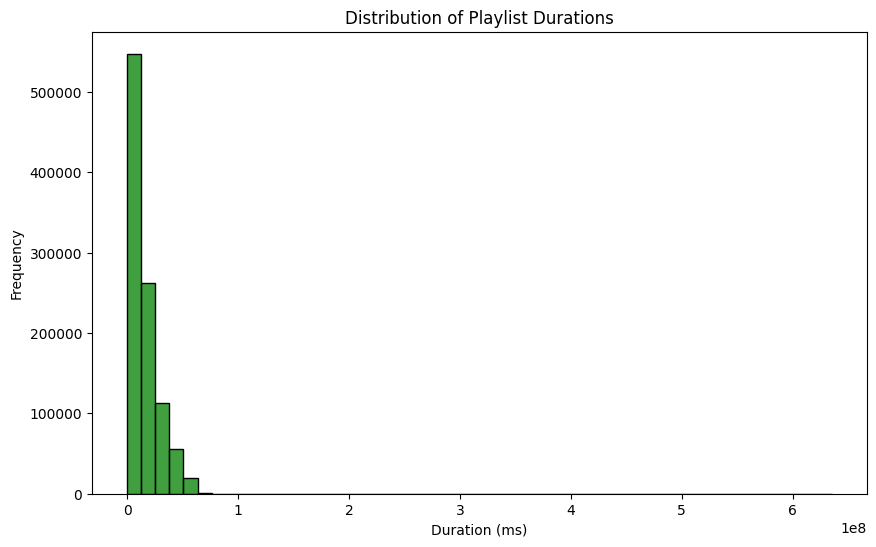

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(playlists_df['duration_ms'], bins=50, color='green')
plt.title('Distribution of Playlist Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')

### Top 10 Popular Artists
**Notes:** Popular arirtisrs will be ranked based on the varible called 'Popularity' at artists level. This popularity has a range of 1-100. In this graph, we only show top 10 most popular artists.

In [4]:
artist_appearance_counts = tracks_df['artist_uri'].value_counts()

In [5]:
len(tracks_df['artist_uri'].unique())

295860

In [6]:
artist_appearance_counts 

artist_uri
spotify:artist:3TVXtAsR1Inumwj472S9r4    846937
spotify:artist:5K4W6rqBFWDnAN6FQUkS6x    413297
spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg    353624
spotify:artist:5pKCCKE2ajJHZ9KAiaK11H    339570
spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ    316603
                                          ...  
spotify:artist:7F3ZFe9T4tkEoT3sc0q1GP         1
spotify:artist:3ZNY8lSinh57ii0AiLHtxH         1
spotify:artist:0UUuydPM5Kd0SDWDgFNvKM         1
spotify:artist:0BffCye1dZNDJXXhUyy7VO         1
spotify:artist:4K1RDdFMeSKKF13bOgAIGm         1
Name: count, Length: 295860, dtype: int64

In [7]:
artist_counts_df = artist_appearance_counts.reset_index()
artist_counts_df.columns = ['artist_uri', 'occurence']
artist_counts_df

,artist_uri,occurence
0,spotify:artist:3TVXtAsR1Inumwj472S9r4,846937
1,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,413297
2,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,353624
3,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,339570
4,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,316603
...,...,...
295855,spotify:artist:7F3ZFe9T4tkEoT3sc0q1GP,1
295856,spotify:artist:3ZNY8lSinh57ii0AiLHtxH,1
295857,spotify:artist:0UUuydPM5Kd0SDWDgFNvKM,1
295858,spotify:artist:0BffCye1dZNDJXXhUyy7VO,1


In [29]:
merged_df = pd.merge(artist_counts_df, tracks_df[['artist_uri', 'artist_name']], on='artist_uri', how='left').drop_duplicates(subset='artist_uri')

In [33]:
merged_df[:3]

,artist_uri,occurence,artist_name
0,spotify:artist:3TVXtAsR1Inumwj472S9r4,846937,Drake
846937,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,413297,Kanye West
1260234,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,353624,Kendrick Lamar


In [36]:
top_20_artists_df = merged_df.sort_values(by='occurence', ascending=False).head(20)
top_20_artists_df

,artist_uri,occurence,artist_name
0,spotify:artist:3TVXtAsR1Inumwj472S9r4,846937,Drake
846937,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,413297,Kanye West
1260234,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,353624,Kendrick Lamar
1613858,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,339570,Rihanna
1953428,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,316603,The Weeknd
2270031,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,294667,Eminem
2564698,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,272116,Ed Sheeran
2836814,spotify:artist:1RyvyyTE3xzB2ZywiAwp0i,249986,Future
3086800,spotify:artist:1uNFoZAHBGtllmzznpCI3s,243119,Justin Bieber
3329919,spotify:artist:6l3HvQ5sa6mXTsMTB19rO5,241556,J. Cole


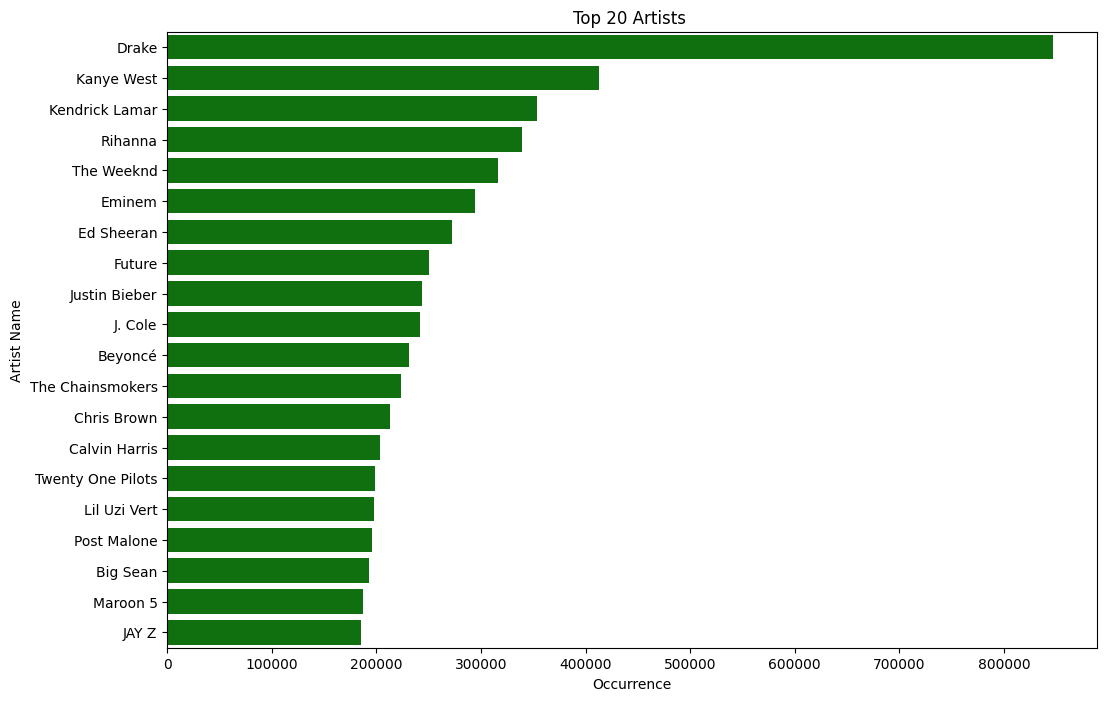

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x='occurence', y='artist_name', data=top_20_artists_df,color='green')
plt.title('Top 20 Artists ')
plt.xlabel('Occurrence')
plt.ylabel('Artist Name')
plt.show()

### Top 10 Popular Songs

First, let's create a dataframe to see the occurence of each song across the playlists.

In [37]:
track_occur = tracks_df['track_uri'].value_counts()

In [38]:
top_20_tracks_info = tracks_df[['track_uri', 'track_name','artist_name']].drop_duplicates().set_index('track_uri').loc[track_occur.head(20).index]


In [39]:
top_20_tracks_info 

,track_name,artist_name
track_uri,,
spotify:track:7KXjTSCq5nL1LoYtL7XAwS,HUMBLE.,Kendrick Lamar
spotify:track:1xznGGDReH1oQq0xzbwXa3,One Dance,Drake
spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,Broccoli (feat. Lil Yachty),DRAM
spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers
spotify:track:3a1lNhkSLSkpJE4MSHpDu9,Congratulations,Post Malone
spotify:track:5hTpBe8h35rJ67eAWHQsJx,Caroline,Aminé
spotify:track:2EEeOnHehOozLq4aS0n6SL,iSpy (feat. Lil Yachty),KYLE
spotify:track:4Km5HrUvYTaSUfiSGPJeQR,Bad and Boujee (feat. Lil Uzi Vert),Migos
spotify:track:7GX5flRQZVHRAGd6B4TmDO,XO TOUR Llif3,Lil Uzi Vert


In [41]:
top_20_tracks_info['count'] = track_occur.head(20).values

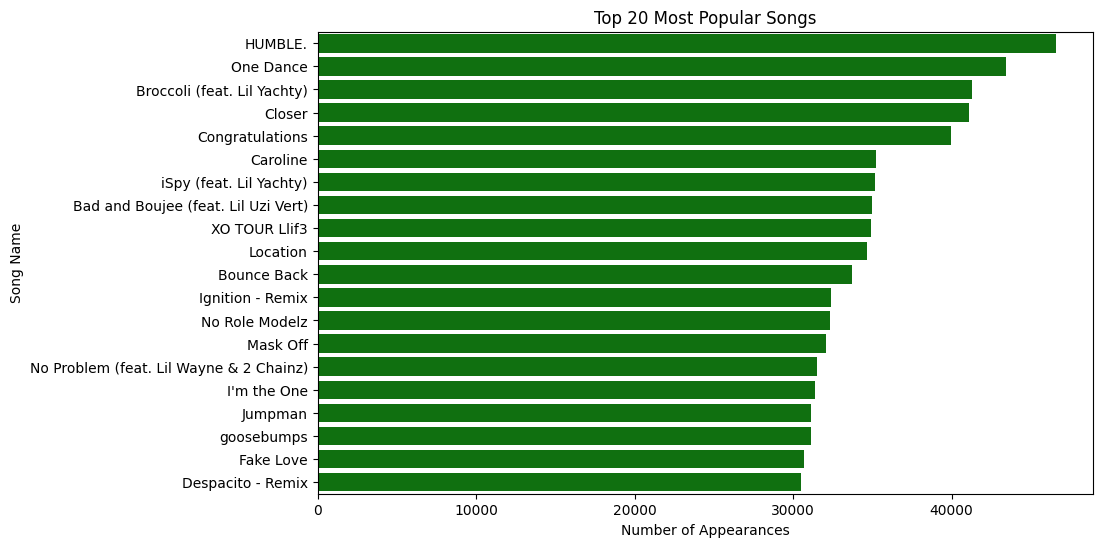

In [42]:
# Step 4: Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_tracks_info['count'], y=top_20_tracks_info['track_name'],color='green')
plt.title('Top 20 Most Popular Songs')
plt.xlabel('Number of Appearances')
plt.ylabel('Song Name')
plt.show()

### Top 10 Drake's  and Jay Z's songs

First, we need to get all of Drake's song. Then, sort it and get the top 10 songs which has the most occuerences. 

In [43]:
drake_tracks_df = tracks_df[tracks_df['artist_name'] == 'Drake']

In [44]:
top10_drake_songs = drake_tracks_df['track_name'].value_counts().head(10)
top10_drake_songs

track_name
One Dance        43447
Jumpman          31119
Fake Love        30678
Hotline Bling    25867
Too Good         24040
Passionfruit     23295
Controlla        20738
Pop Style        19170
Back To Back     18033
Portland         17851
Name: count, dtype: int64

Text(0, 0.5, "Song's Name")

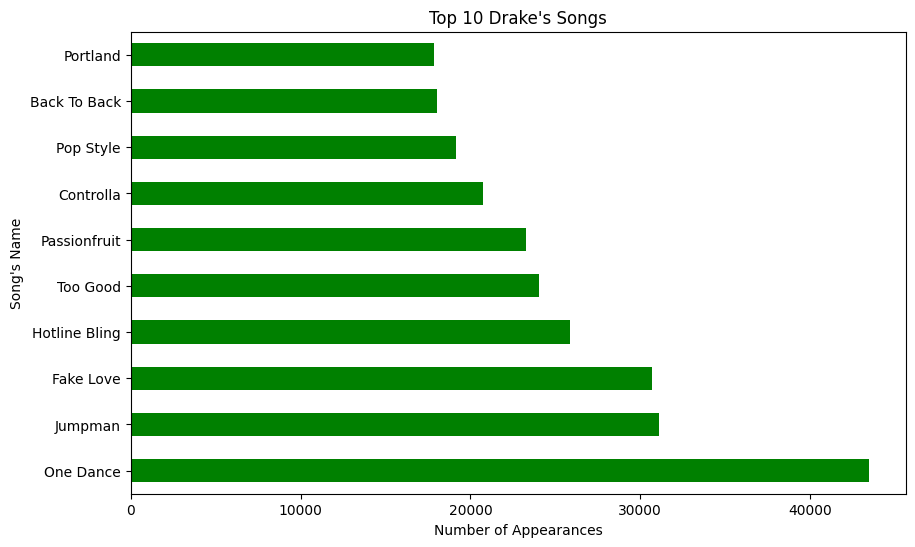

In [45]:
plt.figure(figsize=(10,6))
top10_drake_songs.plot(kind='barh',color='green')
plt.title("Top 10 Drake's Songs")
plt.xlabel('Number of Appearances')
plt.ylabel("Song's Name")


### Top Most Frequence Songs

In [36]:
song_occurrences = Counter(tracks_df['track_uri'])

In [30]:
# Keep The Song Which Appear > 10 playlists
filtered_songs = {track: count for track, count in song_occurrences.items() if count > 1}

In [56]:
filtered_tracks = tracks_df[tracks_df['track_uri'].isin(filtered_songs)]

In [58]:
filtered_tracks.shape

(65273009, 10)

In [40]:
spotifymilsongs.head()

,track_uri,artist_uri,artist_name,track_name
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [46]:
tracks_df1

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,playlist_name,playlist_pid
0,0,Nicki Minaj,spotify:track:7gKIt3rDGIMJDFVSPBnGmj,spotify:artist:0hCNtLu0JehylgoiP8L4Gh,Super Bass,spotify:album:2RfF6dGpYIN5u1mNkfG8Pb,200013,Pink Friday,life,981000
1,1,Dua Lipa,spotify:track:2eAAEa8pxKF7My0EO4rFgR,spotify:artist:6M2wZ9GZgrQXHCFfjv46we,Blow Your Mind (Mwah),spotify:album:01sfgrNbnnPUEyz6GZYlt9,178583,Dua Lipa,life,981000
2,2,ILoveMakonnen,spotify:track:5rnFOEEIBIWZ6dhHrY6zHh,spotify:artist:3aGFCoR8xGN6DKwvdzeSja,Love (feat. Rae Sremmurd),spotify:album:44sGCAuUKSGPbF6fSXO2vZ,283193,Love (feat. Rae Sremmurd),life,981000
3,3,J Balvin,spotify:track:7fwXWKdDNI5IutOMc5OKYw,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5,Mi Gente (feat. Beyoncé),spotify:album:0ARVq1kA5eRP4F5VsZsr3m,209733,Mi Gente (feat. Beyoncé),life,981000
4,4,Era Istrefi,spotify:track:19yIQRLAYMNxmEfdnnQDsS,spotify:artist:4poL7YCSkG7kMnWjAdDU91,No I Love Yous,spotify:album:6z4lsw2W6YwkA3CNDhGP42,180012,No I Love Yous,life,981000
...,...,...,...,...,...,...,...,...,...,...
66346422,3,PLVTINUM,spotify:track:296mmTJOJ904FwHQsSBdDr,spotify:artist:4V2pR2iSd1g0RZCglrP3jn,Champagne & Sunshine,spotify:album:5POt9d7SSnolPIWD34uizU,196363,Champagne & Sunshine,Yeah,930999
66346423,4,Justin Timberlake,spotify:track:0O45fw2L5vsWpdsOdXwNAR,spotify:artist:31TPClRtHm23RisEBtV3X7,SexyBack,spotify:album:2scB1uhcCI1TSf6b9TCZK3,242733,FutureSex/LoveSounds,Yeah,930999
66346424,5,Jeremih,spotify:track:08zJpaUQVi9FrKv2e32Bah,spotify:artist:3KV3p5EY4AvKxOlhGHORLg,Planez,spotify:album:7DMyQuDPe8xzjC0UDSDa96,240320,Late Nights: The Album,Yeah,930999
66346426,7,Chris Brown,spotify:track:3wu9ADop1FXdhToPCxwBL8,spotify:artist:7bXgB6jMjp9ATFy66eO08Z,Take You Down,spotify:album:1UtE4zAlSE2TlKmTFgrTg5,245933,Exclusive - The Forever Edition,Yeah,930999


In [ ]:
# Step 2: Get the top 50% most common songs (based on the occurrence count)
top_50_percent_songs = dict(song_occurrences.most_common(int(len(song_occurrences) * 0.5)))

In [ ]:
top_50_songs_df = tracks_df[tracks_df['track_uri'].isin(top_50_percent_songs.keys())]

In [ ]:
top_50_songs_playlists = top_50_songs_df.groupby('track_uri')['playlist_pid'].nunique()

In [ ]:
top_50_songs_playlists.sort_values(ascending=False)

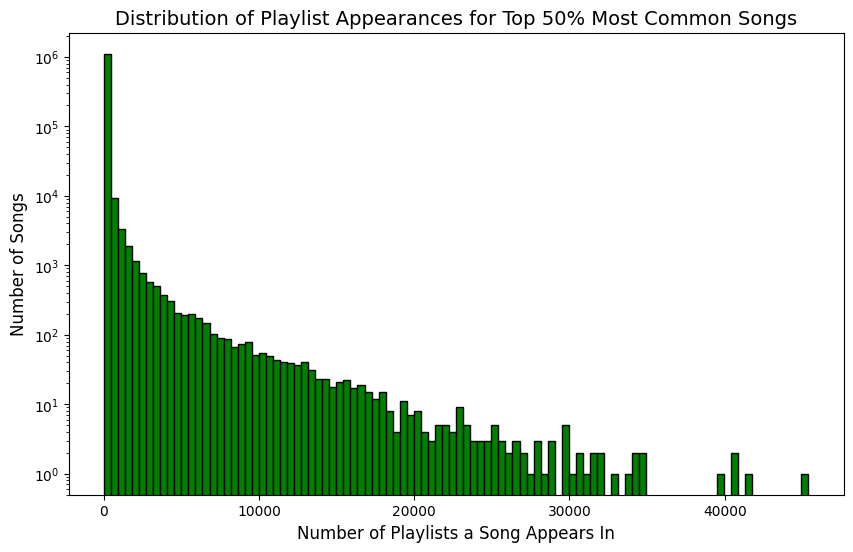

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(top_50_songs_playlists, bins=100, edgecolor='black', color='green')
plt.title('Distribution of Playlist Appearances for Top 50% Most Common Songs', fontsize=14)
plt.xlabel('Number of Playlists a Song Appears In', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.yscale('log')  # Use log scale to better visualize the distribution (long tail)
plt.show()

# My Playlist From Spotify.

In [8]:
myplaylist = pd.read_csv('TramNgoPlaylist.csv')
column_names = ["track_id", "track_name", "artist_name", "spotify_link", "track_uri"]
myplaylist = pd.read_csv("TramNgoPlaylist.csv", names=column_names, header=None)
myplaylist = myplaylist.drop(columns=['spotify_link'])

In [9]:
myplaylist.head()

,track_id,track_name,artist_name,track_uri
0,1rJUbH0v2E8t1GY4OAUTeC,City Girls,"Chris Brown,Young Thug",spotify:track:1rJUbH0v2E8t1GY4OAUTeC
1,2QpMK4mvdyFW5N0JYohVdW,Em Là Châu Báu,"tlinh,RPT MCK",spotify:track:2QpMK4mvdyFW5N0JYohVdW
2,7ewfvLrlI0VNht4vEnoTMh,No Love,"August Alsina,Nicki Minaj",spotify:track:7ewfvLrlI0VNht4vEnoTMh
3,4SJHHpKhcuXwDsCsPqshXj,El Efecto,"Rauw Alejandro,Chencho Corleone",spotify:track:4SJHHpKhcuXwDsCsPqshXj
4,0AFGP6yJiakwce0evtrbxd,Hoàng Hôn,Cheung,spotify:track:0AFGP6yJiakwce0evtrbxd
